In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('../Telco_customer_churn_adapted_v2.xlsx', sheet_name='D A T A')
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,CLTV (Predicted Thou. IDR)
0,1710,1,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.505,Yes,5371.6
1,1094,9,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.635,Yes,7023.9
2,143,12,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.700,Yes,4595.5
3,1140,1,Bandung,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,24.830,Yes,7657.0
4,244,7,Bandung,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Pulsa,25.025,Yes,5835.7


In [4]:
df = df.drop('Customer ID', axis=1)

In [5]:
categorical_columns = ["Location", "Device Class", "Games Product", "Music Product", "Education Product",
                       "Call Center", "Video Product", "Use MyApp", "Payment Method", "Churn Label"]

df = pd.get_dummies(df, columns=categorical_columns)

In [6]:
df.head()

,Tenure Months,Monthly Purchase (Thou. IDR),CLTV (Predicted Thou. IDR),Location_Bandung,Location_Jakarta,Device Class_High End,Device Class_Low End,Device Class_Mid End,Games Product_,Games Product_No,...,Video Product_Yes,Use MyApp_No,Use MyApp_No internet service,Use MyApp_Yes,Payment Method_Credit,Payment Method_Debit,Payment Method_Digital Wallet,Payment Method_Pulsa,Churn Label_No,Churn Label_Yes
0,1,24.505,5371.6,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,9,24.635,7023.9,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,12,24.700,4595.5,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,1,24.830,7657.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,7,25.025,5835.7,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [7]:
# Menggunakan StandardScaler untuk mengubah data menjadi z-score
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [8]:
# Menentukan jumlah komponen utama yang diinginkan
n_components = len(df.columns)  # Anda dapat menyesuaikan jumlahnya sesuai kebutuhan

# Menerapkan PCA
pca = PCA(n_components=n_components)
pca.fit(scaled_data)

# Variance explained oleh setiap komponen utama
explained_variance = pca.explained_variance_ratio_

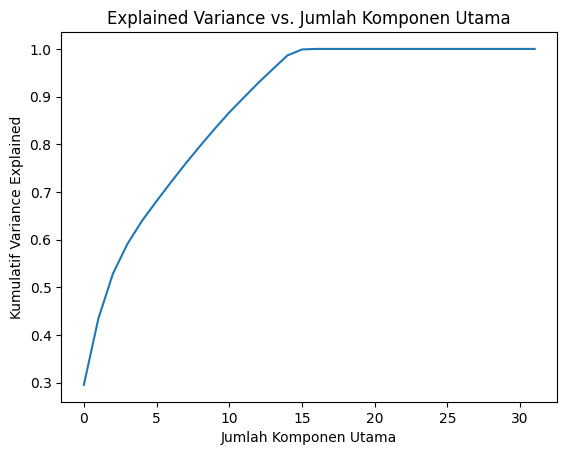

In [9]:
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Jumlah Komponen Utama')
plt.ylabel('Kumulatif Variance Explained')
plt.title('Explained Variance vs. Jumlah Komponen Utama')
plt.show()

In [10]:
transformed_data = pca.transform(scaled_data)


In [11]:
from sklearn.cluster import KMeans

# Inisialisasi model K-Means dengan jumlah cluster yang telah ditentukan
kmeans = KMeans(n_clusters=3)  # Gantilah dengan jumlah cluster yang sesuai

# Melatih model pada data yang telah diubah menggunakan komponen utama
kmeans.fit(transformed_data)

# Mendapatkan label cluster untuk setiap data point
cluster_labels = kmeans.labels_


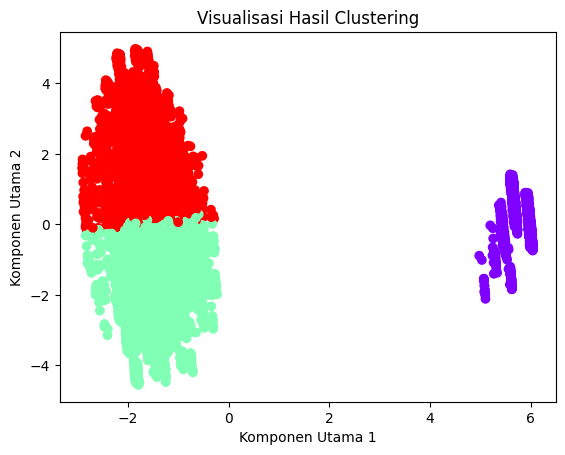

In [12]:
import matplotlib.pyplot as plt

# Anda memiliki data yang telah ditransformasikan oleh PCA
# Misalnya, Anda memiliki dua komponen utama yang digunakan
x = transformed_data[:, 0]  # Komponen Utama 1
y = transformed_data[:, 1]  # Komponen Utama 2

# Label cluster yang telah Anda hasilkan dari algoritma clustering
cluster_labels = kmeans.labels_  # Gantilah dengan label cluster yang sesuai

# Buat scatter plot dengan warna berdasarkan label cluster
plt.scatter(x, y, c=cluster_labels, cmap='rainbow')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.title('Visualisasi Hasil Clustering')
plt.show()


In [13]:
x

array([ 5.62041899,  5.60235974,  5.6132564 , ..., -1.66003504,
       -0.77231862, -2.13491639])